In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("fine_food_reviews_with_embeddings_1k.csv")
df.head(2)

,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding
0,0,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007018072064965963, -0.02731654793024063, 0..."
1,297,B003VXHGPK,A21VWSCGW7UUAR,4,"Good, but not Wolfgang Puck good","Honestly, I have to admit that I expected a li...","Title: Good, but not Wolfgang Puck good; Conte...",178,"[-0.003140551969408989, -0.009995664469897747,..."


In [5]:
import numpy as np 

In [6]:
df.dtypes

Unnamed: 0     int64
ProductId     object
UserId        object
Score          int64
Summary       object
Text          object
combined      object
n_tokens       int64
embedding     object
dtype: object

In [7]:
from ast import literal_eval

In [8]:
matrix = np.array(df.embedding.apply(literal_eval).to_list())

In [9]:
matrix

array([[ 7.01807206e-03, -2.73165479e-02,  1.05734831e-02, ...,
        -7.01120170e-03, -2.18614824e-02, -3.75671238e-02],
       [-3.14055197e-03, -9.99566447e-03, -3.48033849e-03, ...,
        -9.74494778e-03, -2.39829952e-03, -9.20392852e-03],
       [-1.75724812e-02, -8.26651158e-05, -1.15222773e-02, ...,
        -1.39020244e-02, -3.90170924e-02, -2.35151257e-02],
       ...,
       [-9.74910241e-03, -6.87123602e-03, -5.70622832e-03, ...,
        -3.00459806e-02, -8.14515445e-03, -1.95114054e-02],
       [-5.21062920e-03,  9.60669015e-04,  2.82862745e-02, ...,
        -5.38039953e-03, -1.33138765e-02, -2.71892995e-02],
       [-6.05782261e-03, -1.50158405e-02, -2.07575737e-03, ...,
        -2.90671214e-02, -1.41164539e-02, -2.28756946e-02]])

In [10]:
matrix.shape

(1000, 1536)

In [11]:
from sklearn.manifold import TSNE 

tsne = TSNE(n_components = 2, perplexity = 15, 
            random_state = 42, init = "random",
            learning_rate = 200,)

In [12]:
vis_dims = tsne.fit_transform(matrix)

In [13]:
vis_dims.shape

(1000, 2)

In [14]:
import matplotlib
import matplotlib.pyplot as plt 

In [15]:
colors = ["red","darkorange","gold", "turquoise","darkgreen"]

In [16]:
x = [x for x,y in vis_dims ]
y = [y for x,y in vis_dims ]

In [18]:
df.Score.values[:10]

array([5, 4, 1, 5, 1, 5, 5, 5, 5, 1], dtype=int64)

In [19]:
color_indices= df.Score.values - 1 

In [20]:
color_indices[:10]

array([4, 3, 0, 4, 0, 4, 4, 4, 4, 0], dtype=int64)

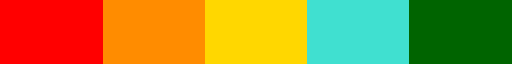

In [21]:
colormap = matplotlib.colors.ListedColormap(colors)
colormap

Text(0.5, 1.0, 'Amazon rating visualized in language using t-SNE')

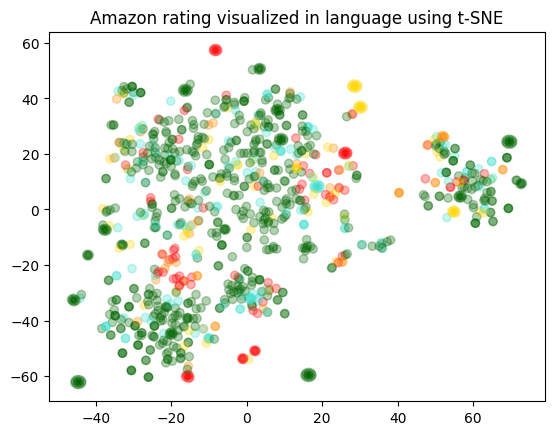

In [22]:
plt.scatter(x,y, c=color_indices, cmap=colormap, alpha=0.3)
plt.title("Amazon rating visualized in language using t-SNE")